In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#read the file
    
data = pd.read_table('6119-hybridOut-June17-27.txt', skiprows=1)

#drop columns with NaN

data = data.dropna(axis='columns', how ='all')

#fix the headers

data = data.rename({'Event': 'Event', 'MinFracDay': 'NmHitDAQ1', \

                   'JulDay':'MinFracDay','Unnamed: 6':'JulDay', \

                   'Unnamed: 8':'SSDB', 'Unnamed: 10':'Hit1.ch1', \

                   'Unnamed: 13':'Hit1.ch2','Unnamed: 16':'Hit1.ch3', \

                   'Unnamed: 19':'Hit1.ch4','Unnamed: 22':'Hit2.ch1', \

                   'Unnamed: 25':'Hit2.ch2','Unnamed: 28':'Hit2.ch3', \

                   'Unnamed: 31':'Hit2.ch4'

                   },

                  axis=1)
cols = data.columns

cols = cols.map(lambda x: x.replace('#', '_') if isinstance(x, (str or unicode)) else x)

data.columns = cols

data.head(3)

,Event,NmHitDAQ1,MinFracDay,JulDay,SSDB,eventDateTime,Hit1.ch1,PW1,Hit1.ch2,PW2,...,Hit1.ch4,PW4,Hit2.ch1,PW1.1,Hit2.ch2,PW2.1,Hit2.ch3,PW3.1,Hit2.ch4,PW4.1
0,1,4,0.500012,2459747,43201.03,6/17/2022 0:0:1,0.00,17.50,2.50,25.00,...,3.0,25.01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2,4,0.500012,2459747,43201.07,6/17/2022 0:0:1,0.75,22.49,0.75,23.75,...,0.0,23.75,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,3,2,0.500013,2459747,43201.16,6/17/2022 0:0:1,-1.00,-1.00,-1.00,-1.00,...,0.0,32.50,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


(-30.0, 30.0)

(-30.0, 30.0)

Text(0.5, 0, 'Ch3 - Ch2')

Text(0, 0.5, 'Ch4 - Ch1')

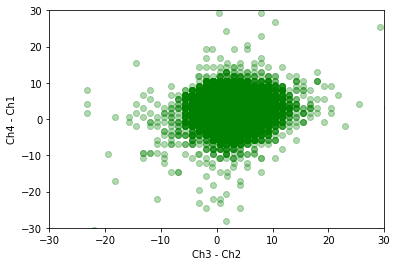

In [3]:
#Plotting a Scatter Plot
data['Filter_1'] = data.iloc[:, 6] != -1  
data['Filter_2'] = data.iloc[:, 8] != -1 
data['Filter_3'] = data.iloc[:, 10] != -1 
data['Filter_4'] = data.iloc[:, 12] != -1 

filter_to_data = data.query('Filter_1 == True and Filter_2 == True and Filter_3 == True and Filter_4 == True')

#Creating 2 new columns to store change
filter_to_data['Delta_T'] = (filter_to_data['Hit1.ch4'] - filter_to_data['Hit1.ch1'])
filter_to_data['Delta_T_V2'] = (filter_to_data['Hit1.ch3'] - filter_to_data['Hit1.ch2'])
#Setting them to x and y axis
x = filter_to_data['Delta_T_V2']
y = filter_to_data['Delta_T'] 
#new_min_y = min(y)
#new_max_y = max(y)
#Plotting Scatter Plot
plt.scatter(x, y, alpha=0.3, color = 'green')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.xlabel("Ch3 - Ch2")
plt.ylabel("Ch4 - Ch1")

Text(0.5, 0, 'Ch3 - Ch2')

Text(0, 0.5, 'Ch4 - Ch1')

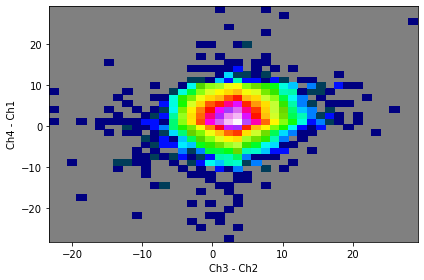

In [47]:
#Plotting a 2D Histogram

filter_to_data['Delta_T'] = (filter_to_data['Hit1.ch3'] - filter_to_data['Hit1.ch2'])
filter_to_data['Delta_T_V2'] = (filter_to_data['Hit1.ch4'] - filter_to_data['Hit1.ch1'])

#Creating to empty lists
no_outlier_data_V2 = []
no_outlier_data = []
for a,b in zip(filter_to_data['Delta_T'], filter_to_data['Delta_T_V2']):
    if (a > -30 and a < 30 and b > -30 and b < 30): #Change to your specific limits
        no_outlier_data_V2.append(b)
        no_outlier_data.append(a)

#print(np.size(no_outlier_data))
#print(np.size(no_outlier_data_V2))

#Plotting 2D Histogram
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(no_outlier_data, no_outlier_data_V2,  bins= 40, norm = mpl.colors.LogNorm(), cmap = 'gist_ncar')
plt.xlabel('Ch3 - Ch2')
plt.ylabel('Ch4 - Ch1')
ax.set_facecolor('grey') #Change color of background

Text(0.5, 0, 'Ch3 - Ch1')

Text(0, 0.5, 'Ch3 - Ch2')

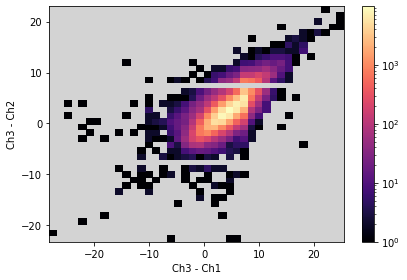

In [48]:
filter_to_data['Delta_T_V3'] = (filter_to_data['Hit1.ch3'] - filter_to_data['Hit1.ch1'])
filter_to_data['Delta_T_V4'] = (filter_to_data['Hit1.ch3'] - filter_to_data['Hit1.ch2'])

no_outlier_data_V3 = []
no_outlier_data_V4 = []
for a,b in zip(filter_to_data['Delta_T_V3'], filter_to_data['Delta_T_V4']):
    if (a > -30 and a < 30  and b > -30 and b < 30):
        no_outlier_data_V3.append(b)
        no_outlier_data_V4.append(a)

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(no_outlier_data_V4, no_outlier_data_V3,  bins= 40, norm = mpl.colors.LogNorm(), cmap = 'magma')

#Creating the colorbar
fig.colorbar(hist[3], ax = ax)
plt.xlabel('Ch3 - Ch1')
plt.ylabel('Ch3 - Ch2')

ax.set_facecolor('lightgrey') 

Text(0.5, 0, 'Ch3 - Ch1 (35 events)')

Text(0, 0.5, 'Ch3 - Ch2')

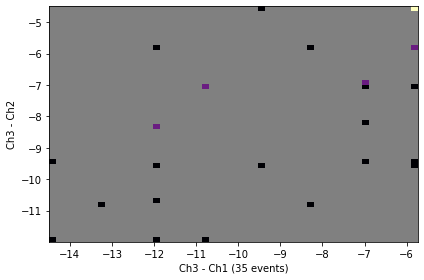

In [49]:
no_outlier_data_V3_1 = []
no_outlier_data_V4_1 = []
for a,b in zip(filter_to_data['Delta_T_V3'], filter_to_data['Delta_T_V4']):
    if (a > -15.2 and a < -5.2  and b > -13.14 and b < -3.54): #Focusing on Signal Region
        no_outlier_data_V3_1.append(b)
        no_outlier_data_V4_1.append(a)


events = (np.size(no_outlier_data_V3_1)) #Calculates the number of possible Upward Muon Candidates
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(no_outlier_data_V4_1, no_outlier_data_V3_1,  bins= 60, norm = mpl.colors.LogNorm(), cmap = 'magma')
plt.xlabel('Ch3 - Ch1 (' + str(events) + ' events)')
plt.ylabel('Ch3 - Ch2')
ax.set_facecolor('grey') 

Text(0.5, 0.98, 'Title')

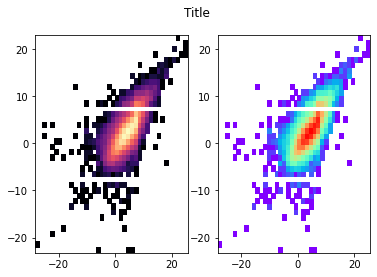

In [50]:
#2 Plots Side By Side
fig, (ax, ax1) = plt.subplots(1, 2)
fig.suptitle('Title')
hist = ax.hist2d(no_outlier_data_V4, no_outlier_data_V3,  bins= 40, norm = mpl.colors.LogNorm(), cmap = 'magma')
hist = ax1.hist2d(no_outlier_data_V4, no_outlier_data_V3,  bins= 40, norm = mpl.colors.LogNorm(), cmap = 'rainbow')

In [51]:
#Using Signal Region to See Specific Upward Muon Candidates (3 Channels)
new_ch1 = []
new_ch2 = []
new_ch3 = []
it = filter_to_data.iterrows()  #get iterator
for index, row in it:
    a = row.Delta_T
    b = row.Delta_T_V2
    c = row.Delta_T_V3
    if ((a > -9.3 and a < -4.9) and (b > - 10.8 and b < -6.0) and (c > -12.7 and c < -7.7)): #Signal Region Limits (1 Sigma Cut)
        new_ch1.append(a)
        new_ch2.append(b)
        new_ch3.append(c)

potential_candidates = np.size(new_ch1)

print("The total number of potential upward muon candidates is " + str(potential_candidates))

The total number of potential upward muon candidates is 4


Text(0.5, 0, 'Ch3 - Ch1')

Text(0, 0.5, 'Pulse Width 1')

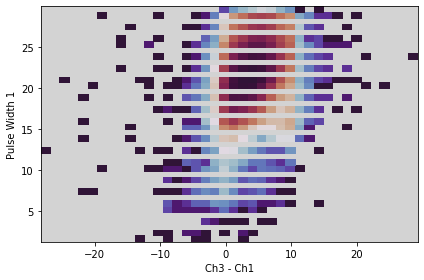

In [52]:
#Plotting 2D Histogram with Pulse Width

filter_to_data['Delta_T_V3'] = (filter_to_data['Hit1.ch3'] - filter_to_data['Hit1.ch1'])

no_outlier_data_V5 = []
no_outlier_data_V6 = []
for a,b in zip(filter_to_data['Delta_T_V3'], filter_to_data['PW1']):
    if (a > -30 and a < 30  and b > -30 and b < 30):
        no_outlier_data_V5.append(b)
        no_outlier_data_V6.append(a)


fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(no_outlier_data_V6, no_outlier_data_V5,  bins= 40, norm = mpl.colors.LogNorm(), cmap = 'twilight_shifted')
plt.xlabel('Ch3 - Ch1')
plt.ylabel('Pulse Width 1')
ax.set_facecolor('lightgrey') 